<a href="https://colab.research.google.com/github/Gajalakshmisubramani/PRODIGY_ML_01/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report

data importing

In [ ]:
data= pd.read_csv('/content/train (1).csv')
data.head()
subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'OverallQual', 'TotRmsAbvGrd', 'SalePrice']
df=data[subset]
print(df)

      GrLivArea  BedroomAbvGr  FullBath  HalfBath  OverallQual  TotRmsAbvGrd  \
0          1710             3         2         1            7             8   
1          1262             3         2         0            6             6   
2          1786             3         2         1            7             6   
3          1717             3         1         0            7             7   
4          2198             4         2         1            8             9   
...         ...           ...       ...       ...          ...           ...   
1455       1647             3         2         1            6             7   
1456       2073             3         2         0            6             7   
1457       2340             4         2         0            7             9   
1458       1078             2         1         0            5             5   
1459       1256             3         1         1            5             6   

      SalePrice  
0        208500  
1  

data Wrangling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   OverallQual   1460 non-null   int64
 5   TotRmsAbvGrd  1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [ ]:
df.describe()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,OverallQual,TotRmsAbvGrd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,0.382877,6.099315,6.517808,180921.195890
std,525.480383,0.815778,0.550916,0.502885,1.382997,1.625393,79442.502883
min,334.000000,0.000000,0.000000,0.000000,1.000000,2.000000,34900.000000
25%,1129.500000,2.000000,1.000000,0.000000,5.000000,5.000000,129975.000000
50%,1464.000000,3.000000,2.000000,0.000000,6.000000,6.000000,163000.000000
75%,1776.750000,3.000000,2.000000,1.000000,7.000000,7.000000,214000.000000
max,5642.000000,8.000000,3.000000,2.000000,10.000000,14.000000,755000.000000


In [ ]:
df.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
OverallQual     0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

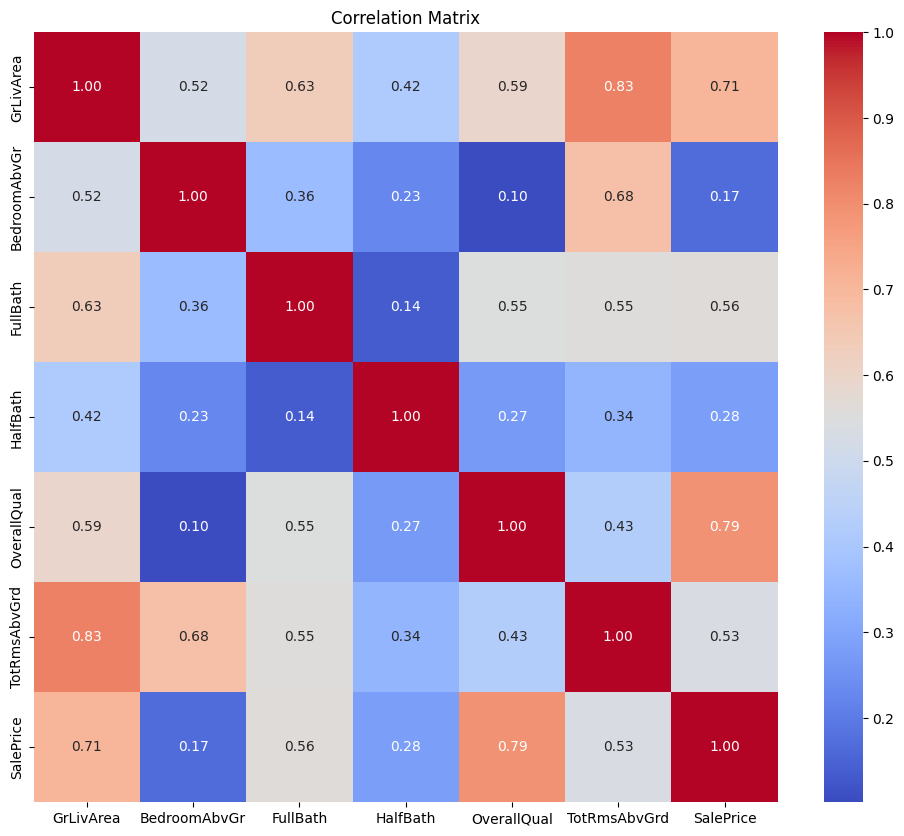

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

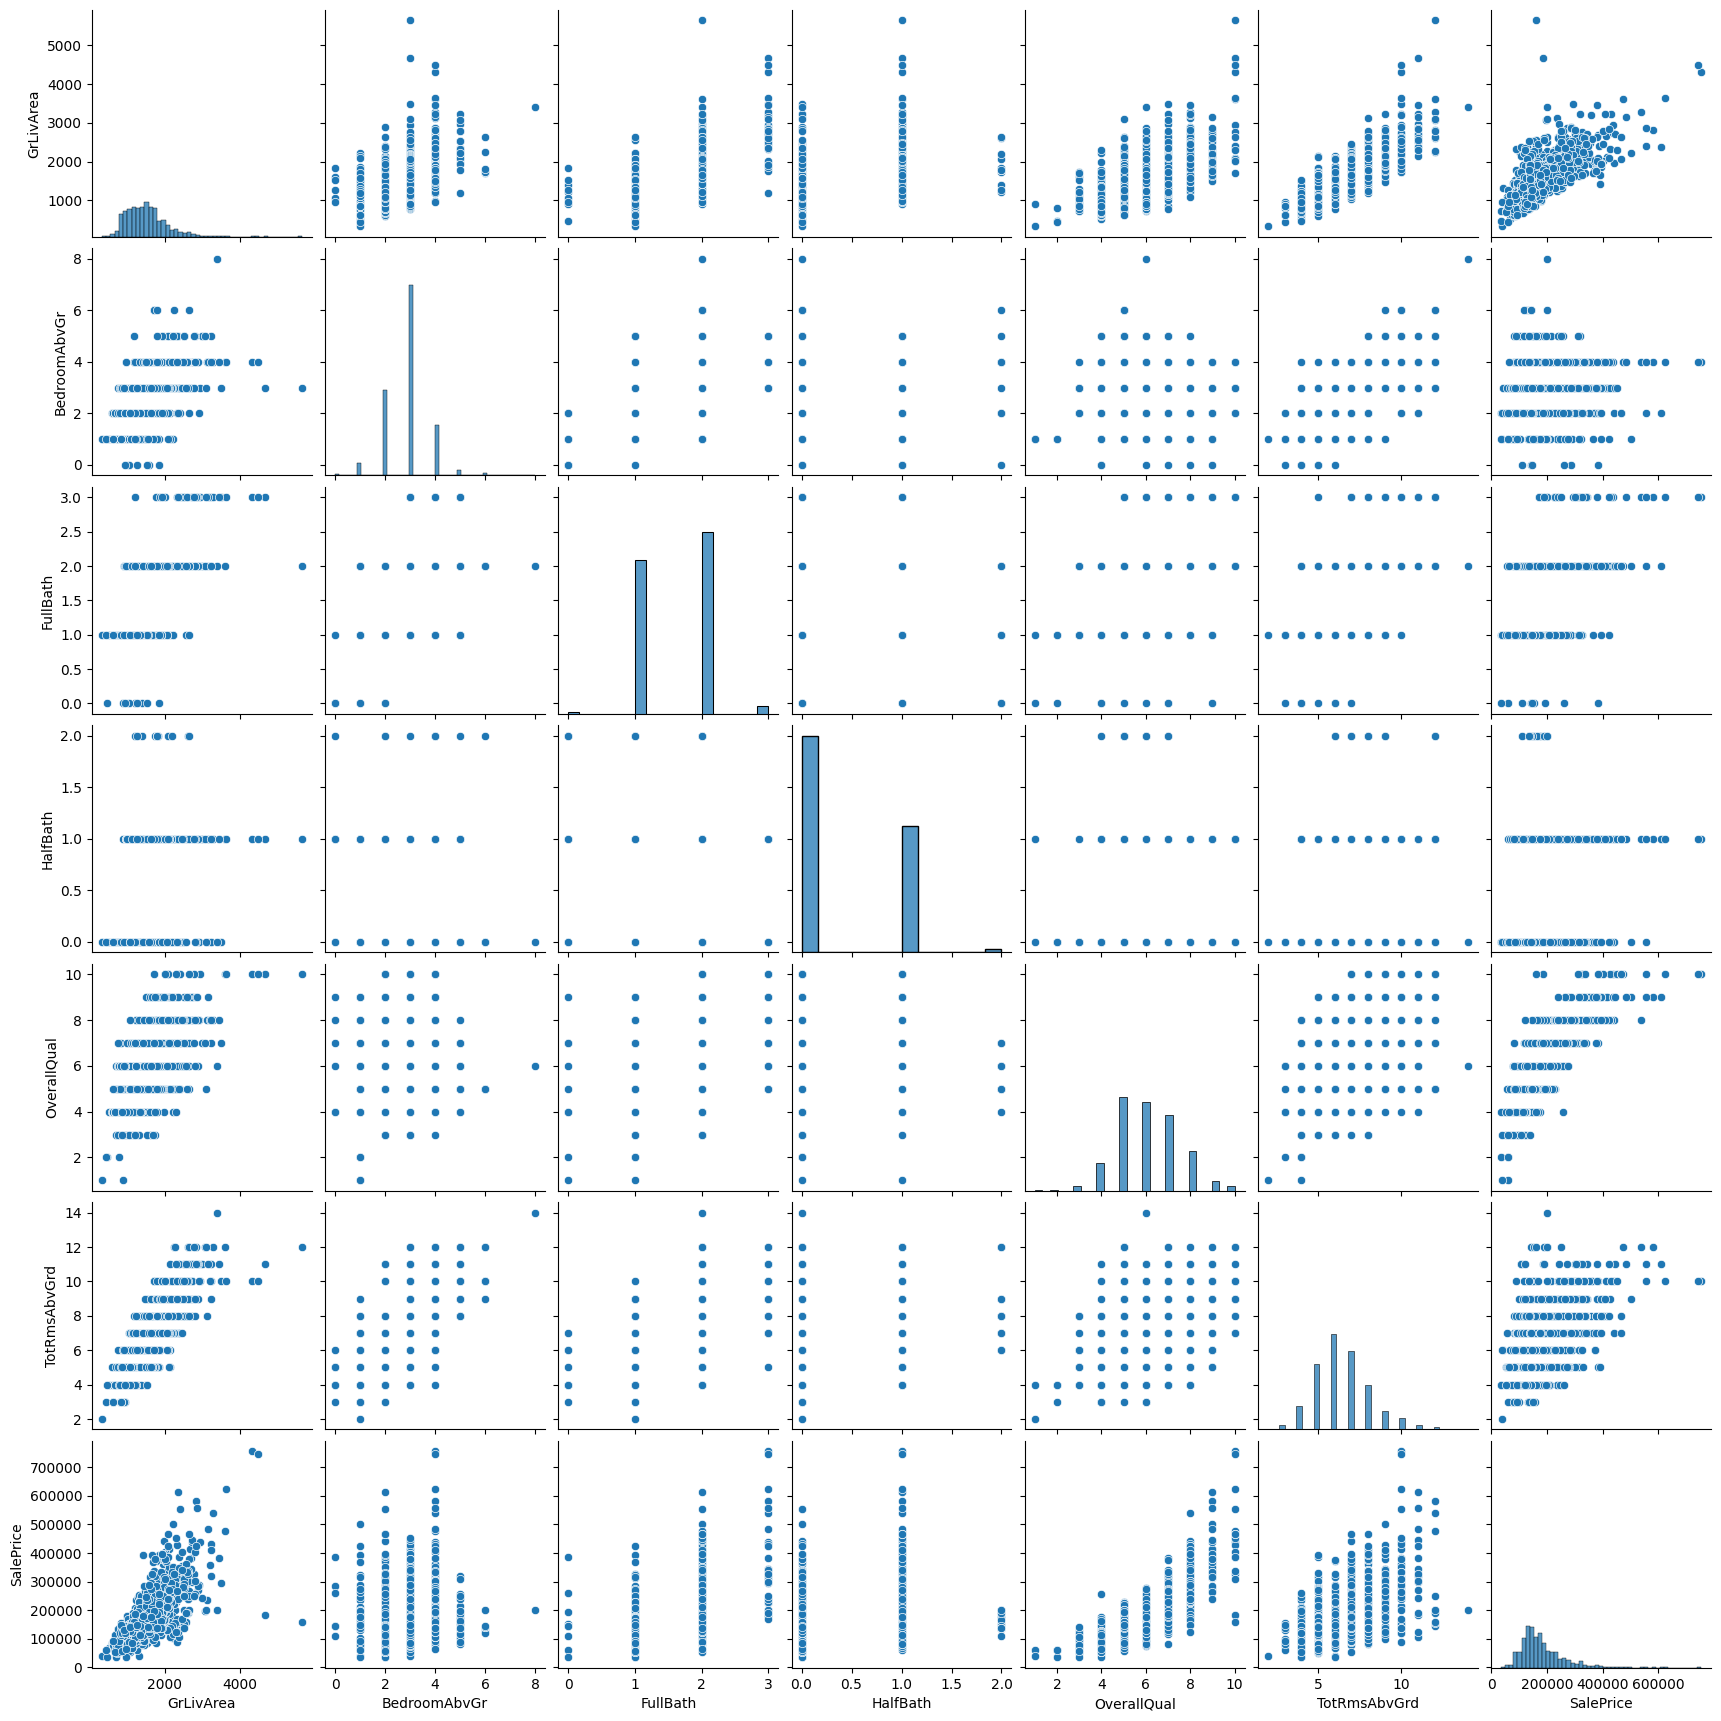

In [ ]:
sns.pairplot(df)

preprocessing

In [ ]:
features = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'OverallQual', 'TotRmsAbvGrd']]
target = df['SalePrice']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

linear regression model by manual selection of parameters

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean Squared Error: 1819087135.4324396
R-squared: 0.762840968389591


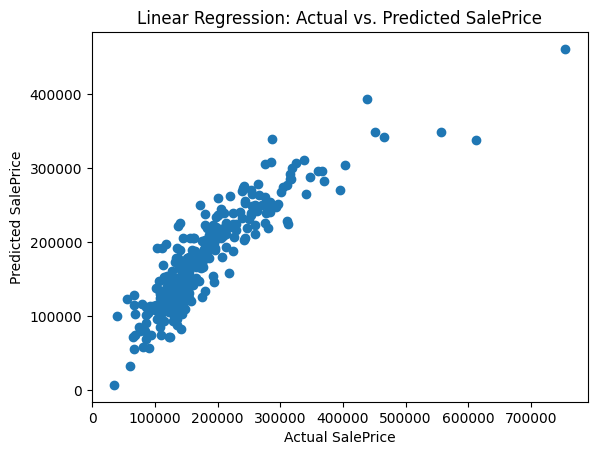

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Linear Regression: Actual vs. Predicted SalePrice')
plt.show()

linear regression model by feature selection